# Выбор локации для скважины

Для решения поставленной задачи - оценки прибыли месторождений - необходимо провести проведен анализ данных, сделать предсказания для регионов с помощью метода линейной регрессии. Далее расчитать минимальный необходимый объем добычи и с помощью Bootstrap с 1000 подвыборками, оцененить распределение прибыли. Выводом из данного анализа должен быть наилучший регион для разработки скважин.

### Анализ данных

In [ ]:
#импортируем необходимые модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Для каждого из 3 датасетов проверим, что они не содержат пропусков и построим гистограмму с распределениями по объемам добычи в скважинах.

In [ ]:
d1 = pd.read_csv('/datasets/geo_data_0.csv')

In [ ]:
d1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
d1['id'].duplicated().sum()

10

In [ ]:
d1 = d1.drop_duplicates(subset=['id'], keep='first')
d1 = d1.reset_index(drop=True)

In [ ]:
d1['id'].duplicated().sum()

0

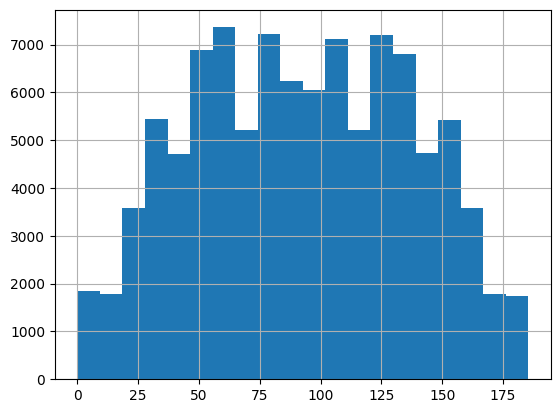

In [ ]:
d1['product'].hist(bins = 20);

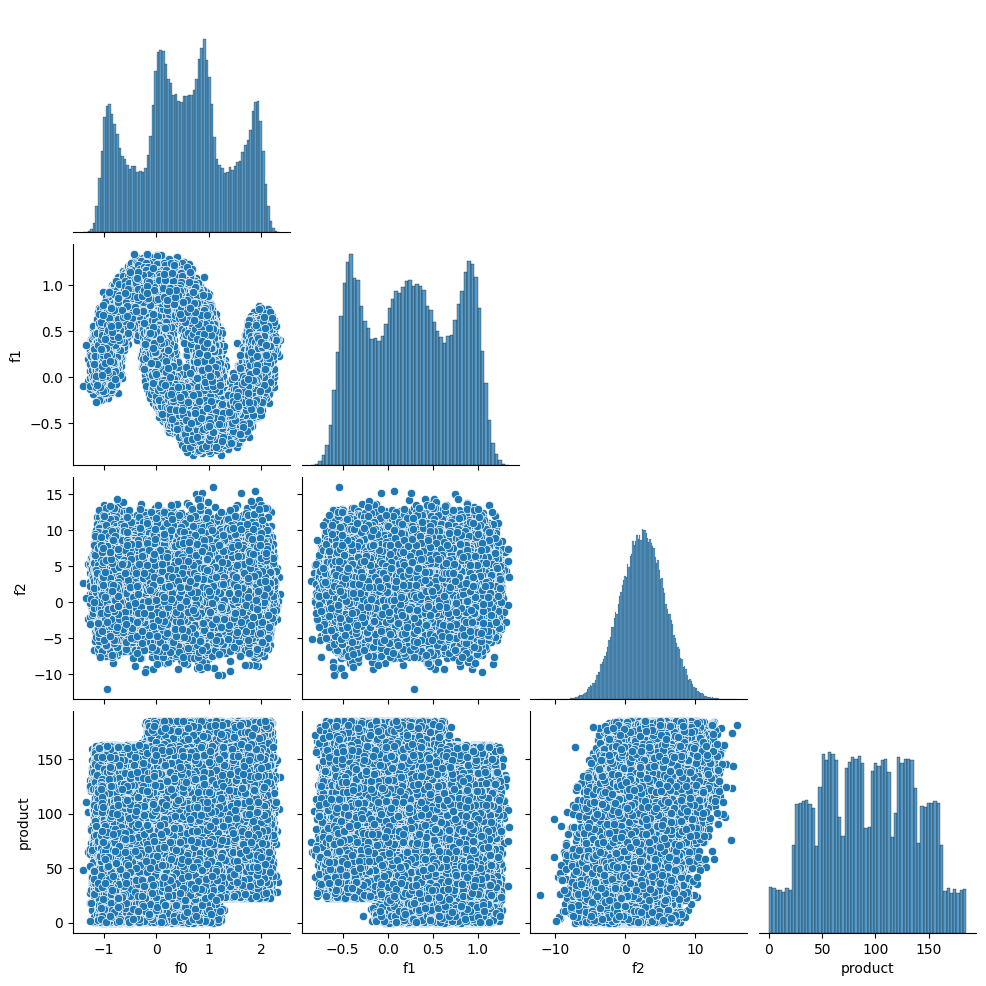

In [ ]:
sns.pairplot(d1.drop('id', axis = 1), corner = True);

In [ ]:
d2 = pd.read_csv('/datasets/geo_data_1.csv')

In [ ]:
d2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
d2['id'].duplicated().sum()

4

In [ ]:
d2 = d2.drop_duplicates(subset=['id'], keep='first')
d2 = d2.reset_index(drop=True)
d2['id'].duplicated().sum()

0

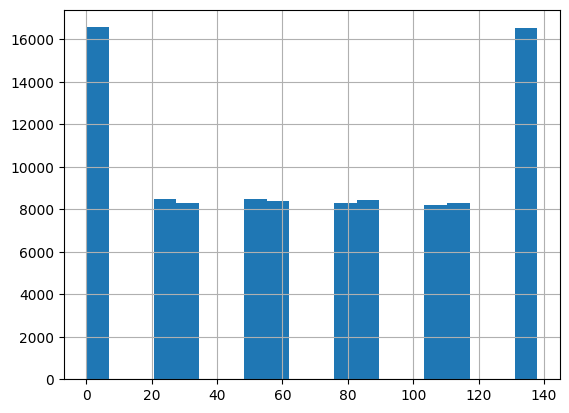

In [ ]:
d2['product'].hist(bins = 20);

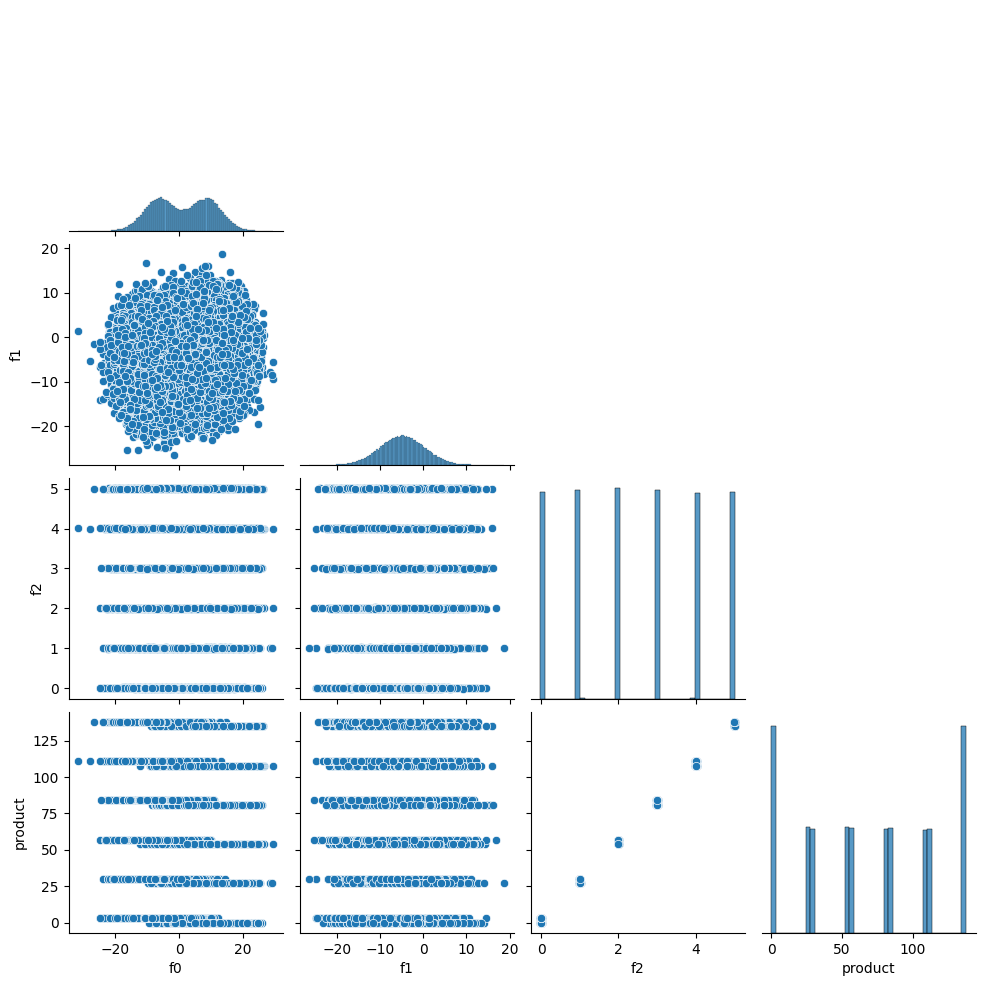

In [ ]:
sns.pairplot(d2.drop('id', axis = 1), corner = True);

In [ ]:
len(d2['product'].unique())

12

In [ ]:
d3 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
d3['id'].duplicated().sum()

4

In [ ]:
d3 = d3.drop_duplicates(subset=['id'], keep='first')
d3 = d3.reset_index(drop=True)
d3['id'].duplicated().sum()

0

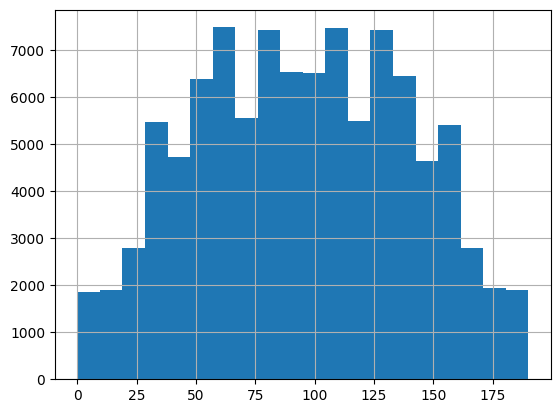

In [ ]:
d3['product'].hist(bins = 20);

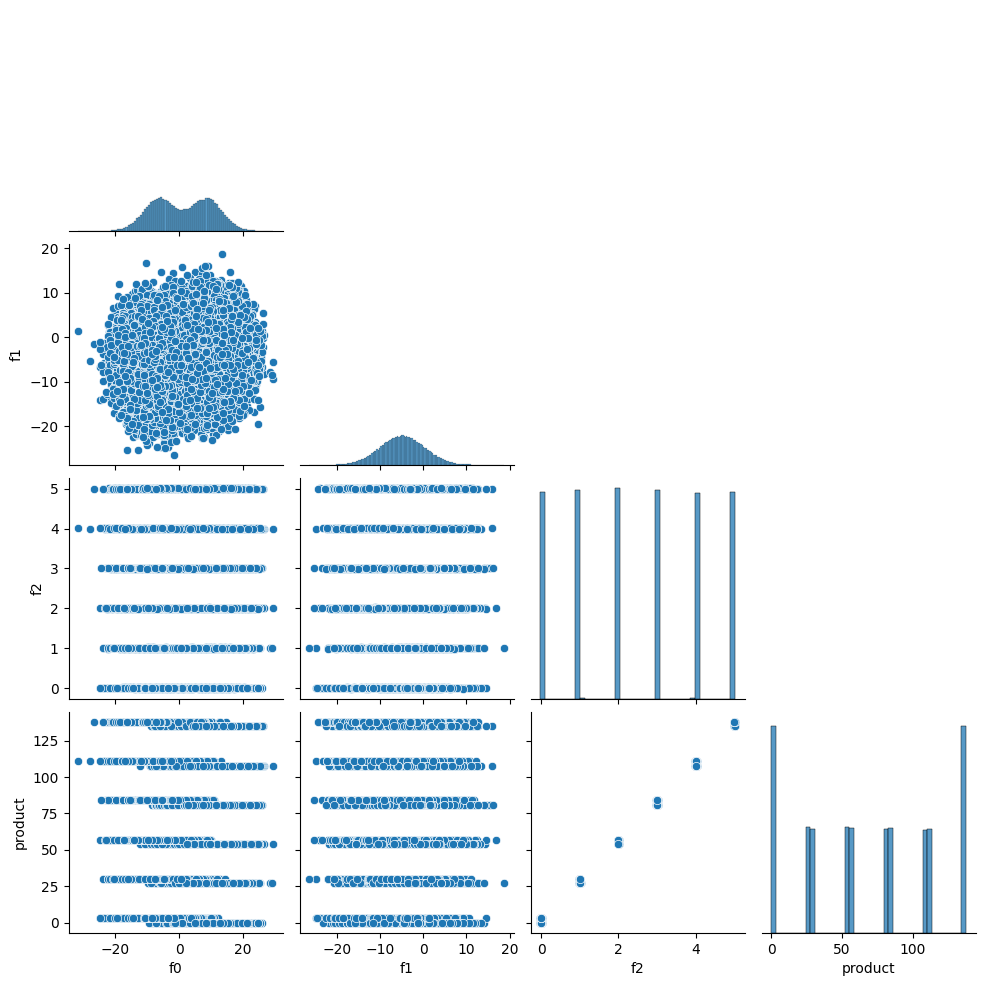

In [ ]:
sns.pairplot(d2.drop('id', axis = 1), corner = True);

Данные не содержат пропусков и готовы к дальнейшему анализу. 

Видим, что в регионе 2 много скважин с очень высокими и низкими значениями выработки, что увеличивает риск неокупаемости - можем разработать 200 скважин, во всех из которых будут приблизительно нулевые запасы.  

### Предсказания

С помощью модели линейной регрессии проведем рассчет среднего запаса сырья в каждом из регионов и оценим RMSE моделей. 

In [ ]:
def linear_prediction(features, target):
    x_train, x_val, y_train, y_val = train_test_split (features, target, test_size = 0.25, random_state = 42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    #print('Средний запас сырья:', y_val.mean())
    #print('RMSE:', mean_squared_error(y_val, pred, squared = False))
    return pred, y_val.reset_index(drop=True), y_val.mean(), mean_squared_error(y_val, pred, squared = False)

In [ ]:
pred_1, y_val1, mean_1, mse_1 = linear_prediction(d1[['f0', 'f1', 'f2']], d1['product'])

In [ ]:
print('Средний запас сырья:', mean_1)
print('RMSE:', mse_1)

Средний запас сырья: 92.38876593595461
RMSE: 37.68508926201444


In [ ]:
pred_2, y_val2, mean_2, mse_2 = linear_prediction(d2[['f0', 'f1', 'f2']], d2['product'])
print('Средний запас сырья:', mean_2)
print('RMSE:', mse_2)

Средний запас сырья: 68.58361591061642
RMSE: 0.8928265978121422


In [ ]:
pred_3, y_val3, mean_3, mse_3 = linear_prediction(d3[['f0', 'f1', 'f2']], d3['product'])
print('Средний запас сырья:', mean_3)
print('RMSE:', mse_3)

Средний запас сырья: 95.25463671658842
RMSE: 40.080822438088305


Во втором регионе предсказать количество сырья по параметром получилось значительно лучше, чем в первом и третьем. При этом средний предсказанный показатель ниже. Таким образом, если мы не выбираем наугад, а заранее знаем параметры, лучше работать во втором регионе - там мы с большей вероятностью будем разрабатывать именно в месте с высоким объемом. 

### Расчет точки безубыточности

In [ ]:
TOTAL = 10*10e9 #бюджет
PRICE = 450*10e3 #доход с единицы
RISKS = 0.025 #2.5% риска допустимо
N = 200 #точек с одного региона

In [ ]:
print('Единиц со всего региона для безубыточности: {0:.2f}'.format(TOTAL/PRICE))
print('Средняя выработка со скважины для безубыточности: {0:.2f}'.format(TOTAL/(N*PRICE)))

Единиц со всего региона для безубыточности: 22222.22
Средняя выработка со скважины для безубыточности: 111.11


In [ ]:
print('Средние объемы выработки')
print(d1['product'].mean(), d2['product'].mean(), d3['product'].mean())

Средние объемы выработки
92.49968421774354 68.82391591804064 94.99834211933378


Полученное значение средней выборки превышает среднее во всех регионах, то есть необходимо выбирать наиболее удачные месторождения. 

### Расчет прибыли для лучших скважин

Отберем 200 лучших скважин в каждом регионе и рассчитаем по ним объем и прибыль.

In [ ]:
df1 = d1.sort_values('product', ascending = False).head(200)
df2 = d2.sort_values('product', ascending = False).head(200)
df3 = d3.sort_values('product', ascending = False).head(200)

In [ ]:
print('Сумма 500 лучших скважин по первому региону: {0:.3e}'.format(df1['product'].sum()))
print('Прибыль: {0:.3e}'.format(df1['product'].sum()*PRICE))
print('Сумма 500 лучших скважин по второму региону: {0:.3e}'.format(df2['product'].sum()))
print('Прибыль: {0:.3e}'.format(df2['product'].sum()*PRICE))
print('Сумма 500 лучших скважин по третьему региону: {0:.3e}'.format(df3['product'].sum()))
print('Прибыль: {0:.3e}'.format(df3['product'].sum()*PRICE))

Сумма 500 лучших скважин по первому региону: 3.697e+04
Прибыль: 1.664e+11
Сумма 500 лучших скважин по второму региону: 2.759e+04
Прибыль: 1.242e+11
Сумма 500 лучших скважин по третьему региону: 3.791e+04
Прибыль: 1.706e+11


В каждом из регионов 200 лучших скважин подходят.

Напишем функцию, которая из данной подвыборки делает предсказания с помощью линейной модели и возвращает суммарный объем выработки с 200 скважин с лучшими предсказаниями. 

In [ ]:
def best_pred(p_subsample, t_subsample):
    state = np.random.RandomState(42)
    x_train, x_val, y_train, y_val = train_test_split (p_subsample, t_subsample, test_size = 0.25, random_state = state)
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_val)        
    pred_sorted = pd.DataFrame(pred).sort_values(0, ascending = False).head(200)
    return sum(pred_sorted[0])


In [ ]:
def prof (target, predict):
    predict_sorted = pd.DataFrame(predict).sort_values(0, ascending = False)
    target_sorted = target[predict_sorted.index][:200]
    product = target_sorted.sum()
    return product * PRICE - TOTAL  

### Bootstrap 

Определим функцию для бутстрепа. Мы как будто 1000 раз начинаем разработку в регионе, рассматривая 500 возможных подходящих скважин и их параметры. На их основе делаем предсказания прибыли с помощью функции, описанной выше, получаем 1000 возможных оценок. Из них получаем среднее, 2.5%-квантиль (нижняя граница 95% доверительного интервала) и рассчитаем, сколько раз прибыль была ниже 0.  

In [ ]:
def bootstrap (pred, t):
    values = []
    deficiency = 0
    state = np.random.RandomState(42)
    for i in range(1000):
        t_subsample = t.sample(n = 500, replace=True, random_state=state)
        p_subsample = pred.loc[t_subsample.index]    
        #predictions = best_pred(p_subsample, t_subsample)
        profit = prof(t_subsample, p_subsample)    
        values.append(profit)
        if profit < 0:
            deficiency+=1

    values = pd.Series(values)
    print('Средняя прибыль - {0:.4e}'.format(values.mean()))
    
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975)
    print('Нижняя граница доверительного интервала - {0:.4e}'.format(lower))    
    print('Число убыткочных вариантов', deficiency)
    print('Вероятность убытков', deficiency/10)

In [ ]:
#ячейка ревьюера

'Риск убытков = {:.2%} '.format((pd.Series([-2, -1, 4, 5])<0).mean())

'Риск убытков = 50.00% '

In [ ]:
bootstrap(pd.Series(pred_1), y_val1)

Средняя прибыль - 4.3182e+09
Нижняя граница доверительного интервала - -1.1810e+09
Число убыткочных вариантов 56
Вероятность убытков 5.6


In [ ]:
bootstrap(pd.Series(pred_2), y_val2)

Средняя прибыль - 4.9066e+09
Нижняя граница доверительного интервала - 8.1021e+08
Число убыткочных вариантов 6
Вероятность убытков 0.6


In [ ]:
bootstrap(pd.Series(pred_3), y_val3)

Средняя прибыль - 4.1208e+09
Нижняя граница доверительного интервала - -1.2951e+09
Число убыткочных вариантов 72
Вероятность убытков 7.2


Требовании о рисках не более 2.5% подходит только 2й регион. 

### Вывод

В ходе работы был проведен анализ данных, сделаны предсказания для регионов с помощью метода линейной регрессии. Далее было расчитано минимальный необходимый объем добычи и применена техника Bootstrap с 1000 подвыборками, оценено распределение прибыли и на основе представленного выше анализа предложены рекомендации по разработке скважин. 

На основе представленного выше анализа можно заявить, что скважины второго региона наилучшим образом описываются линейной моделью, что позволит наилучшим образом выбрать месторождения среди исследуемых и увеличить прибыль.

Полученная с помощью Bootstrap оценка для данного региона показала следубщие параметры: 

Средняя прибыль - 4.9 млрд 

Нижняя граница доверительного интервала (2.5%) - 0.81 млрд 

Вероятность убытков 0.6%